# Aprendizaje por refuerzo

Instalar las siguientes librerias para usar esta notebook:

!pip install swig

!pip install cmake pygame gym[all]

!pip install stable_baselines3

Referencia: https://www.gocoder.one/blog/rl-tutorial-with-openai-gym

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/refuerzo.png)
Fuente de la imagen: medium.com

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/RLdog.jpg)
Fuente: kdnuggets.com

Objetivo: maximizar la recompenza.

**Definiciones importantes:**

- Agente: modelo a entrenar para que tome decisiones.
- Ambiente: Entorno donde interactúa el agente. El ambiente limita y pone reglas.

Entre ambiente y agente hay las siguientes relaciones:

- Acción: posibles acciones que puede tomar el agente en determinado momento.
- Estado (del ambiente): indicadores del ambiente sobre cómo están los diversos elementos que lo componen en determinado momento.
- Recompensas (o penalización): cada acción del agente obtiene un premio o una penalización.

Ver: https://towardsdatascience.com/hands-on-introduction-to-reinforcement-learning-in-python-da07f7aaca88


![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/RLalg.png)
Fuente: medium.com

#### Usar el entorno TAXI

**Contexto:** Taxi es un entorno disponible en Open-IA gym (https://www.gymlibrary.dev/environments/toy_text/taxi/).

- El objetivo de Taxi es recoger pasajeros y dejarlos en el destino en la menor cantidad de movimientos.

- Se comparara un agente de taxis que realiza acciones al azar con uno entrenado mediante Aprendizaje Reforzado.

- Acciones: moverse hacia arriba, abajo, izquierda, derecha, recoger o dejar pasajeros.

Descripción de la documentación:

Hay cuatro ubicaciones designadas en el mundo de la cuadrícula indicadas por R (rojo), G (verde), Y (amarillo) y B (azul). Cuando el episodio inicia, el taxi parte de una casilla aleatoria y el pasajero se encuentra en una ubicación aleatoria. El taxi conduce hasta la ubicación del pasajero, lo recoge, conduce hasta el destino del pasajero (otra de las cuatro ubicaciones especificadas) y luego deja al pasajero. Una vez que se deja al pasajero, el episodio termina.

Map:

+---------+

|R: | : :G|

| : | : : |

| : : : : |

| | : | : |

|Y| : |B: |

+---------+

##### Comportamiento


Hay 6 acciones deterministas discretas:

    0: mover al sur

    1: mover al norte

    2: moverse hacia el este

    3: muévete hacia el oeste

    4: pasajero de recogida

    5: dejar al pasajero

Observaciones

Hay 500 estados discretos ya que hay 25 posiciones de taxi, 5 ubicaciones posibles del pasajero (incluido el caso cuando el pasajero está en el taxi) y 4 ubicaciones de destino.

Tenga en cuenta que hay 400 estados a los que se puede llegar durante un episodio. Los estados faltantes corresponden a situaciones en las que el pasajero se encuentra en el mismo lugar que su destino, ya que esto suele indicar el final de un episodio. Se pueden observar cuatro estados adicionales justo después de un episodio exitoso, cuando tanto el pasajero como el taxi están en el destino. Esto da un total de 404 estados discretos alcanzables.

Cada espacio de estado está representado por la tupla: (fila_taxi, col_taxi, ubicación_pasajero, destino)


Ubicaciones de pasajeros:

    0: R (rojo)

    1: G (verde)

    2: Y (amarillo)

    3: B (azul)

    4: en taxi

Destinos:

    0: R (rojo)

    1: G (verde)

    2: Y (amarillo)

    3: B (azul)

Recompensas

     -1 por paso a menos que se active otra recompensa.

     +20 entregando pasajero.

     -10 ejecutar acciones de “recogida” y “devolución” de forma ilegal.
     
     - Una ilegalidad consiste en ejecutar las acciones"recoger"o "devolver" en lugares donde no hay personas.

![](https://www.gocoder.one/static/state-rewards-62ab43a53e07062b531b3199a8bab5b3.png)

Como llegar al punto R sin perder tantos puntos?

## Q-Learning

### Tablas-Q

Una tabla Q es una tabla de búsqueda que almacena valores que representan las recompensas futuras máximas esperadas que el agente puede esperar por una acción determinada en un estado determinado (conocidos como valores Q).

![](https://i.stack.imgur.com/Bn6MY.gif)

Estas tablas se suelen inicializar en 0s

qtable = np.zeros((state_size, action_size))


Hyperparámetros:

- Tasa de aprendizaje (α): qué tanto el agente debe aceptar nueva información sobre la información previamente aprendida

- Factor de descuento (γ): qué tanto el agente debe considerar las recompensas que podría recibir en el futuro frente a su recompensa inmediata.

#### Primero, analicemos el comportamiento aleatorio

In [11]:
!pip install swig
!pip install cmake pygame gym[all]
!pip install stable_baselines3

In [3]:
import gym
import matplotlib.pyplot as plt

In [4]:
env = gym.make('Taxi-v3', render_mode='human', new_step_api=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# create a new instance of taxi, and get the initial state
state = env.reset()

In [6]:
from IPython import display
import numpy as np
import time
import PIL.Image
import io


def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = io.BytesIO()
    ima = PIL.Image.fromarray(a).save(f, fmt)
    return f.getvalue()

In [7]:
import gym
import numpy as np
import random

def randomtaxi():
    total_reward = 0
    # crear entorno de Taxi
    env = gym.make('Taxi-v3')

    # crear una instancia de Taxi, y obtener un estado inicial
    state = env.reset()

    num_steps = 99

    for s in range(num_steps+1):
        print("Paso: {}/{}".format(s+1, num_steps+1))

        # muestrear una accion aleatoria de la lista de acciones posibles
        action = env.action_space.sample()
        # ejecutar esta accion sobre el entorno
        new_state, reward, done, info = env.step(action)
        # Update to our new state
        state = new_state
        total_reward += reward
        print("Accion {} Estado {} Recompensa {} Total rec {}".format(action, state, reward, total_reward))


        # imprimir nuevo estado
        env.render()

        imagehandle = display.display(display.Image(data=showarray(env.render(mode='rgb_array')), width=450), display_id='gymscr')

        # while True:
        time.sleep(0.01)
        env.step(env.action_space.sample()) # take a random action
        display.update_display(display.Image(data=showarray(env.render(mode='rgb_array')), width=450), display_id='gymscr')

        # if done, finish episode
        if done == True:
            break


    # terminar y cerrar el entorno del taxi
    env.close()
    return total_reward

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don

Paso: 1/100
Accion 0 Estado 427 Recompensa -1 Total rec -1


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


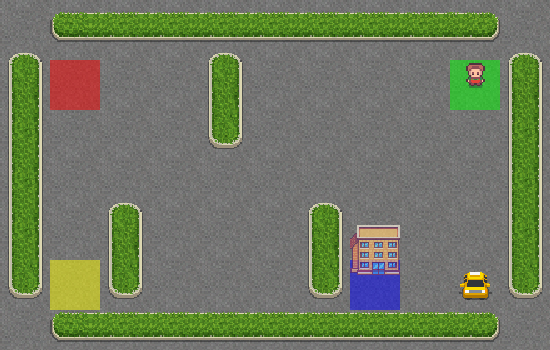

Paso: 2/100
Accion 0 Estado 427 Recompensa -1 Total rec -2
Paso: 3/100
Accion 1 Estado 327 Recompensa -1 Total rec -3
Paso: 4/100
Accion 0 Estado 427 Recompensa -1 Total rec -4
Paso: 5/100
Accion 4 Estado 447 Recompensa -10 Total rec -14
Paso: 6/100
Accion 0 Estado 447 Recompensa -1 Total rec -15
Paso: 7/100
Accion 3 Estado 427 Recompensa -1 Total rec -16
Paso: 8/100
Accion 5 Estado 427 Recompensa -10 Total rec -26
Paso: 9/100
Accion 0 Estado 427 Recompensa -1 Total rec -27
Paso: 10/100
Accion 1 Estado 347 Recompensa -1 Total rec -28
Paso: 11/100
Accion 1 Estado 247 Recompensa -1 Total rec -29
Paso: 12/100
Accion 3 Estado 227 Recompensa -1 Total rec -30
Paso: 13/100
Accion 2 Estado 127 Recompensa -1 Total rec -31
Paso: 14/100
Accion 2 Estado 127 Recompensa -1 Total rec -32
Paso: 15/100
Accion 5 Estado 107 Recompensa -10 Total rec -42
Paso: 16/100
Accion 0 Estado 207 Recompensa -1 Total rec -43
Paso: 17/100
Accion 3 Estado 207 Recompensa -1 Total rec -44
Paso: 18/100
Accion 4 Estado 307

-433

In [8]:
randomtaxi()

In [9]:
import numpy as np
import gym
import random

def rltaxi():

    # create Taxi environment
    env = gym.make('Taxi-v3')

    # initialize q-table
    state_size = env.observation_space.n
    action_size = env.action_space.n
    qtable = np.zeros((state_size, action_size))

    # hyperparameters
    learning_rate = 0.9
    discount_rate = 0.8
    epsilon = 1.0
    decay_rate= 0.005

    # training variables
    num_episodes = 1000
    max_steps = 99 # per episode

    # training
    for episode in range(num_episodes):

        # reset the environment
        state = env.reset()
        done = False

        for s in range(max_steps):

            # exploration-exploitation tradeoff
            if random.uniform(0,1) < epsilon:
                # explore
                action = env.action_space.sample()
            else:
                # exploit
                action = np.argmax(qtable[state,:])

            # take action and observe reward
            new_state, reward, done, info = env.step(action)

            # Q-learning algorithm
            qtable[state,action] = qtable[state,action] + learning_rate * (reward + discount_rate * np.max(qtable[new_state,:])-qtable[state,action])

            # Update to our new state
            state = new_state

            # if done, finish episode
            if done == True:
                break

        # Decrease epsilon
        epsilon = np.exp(-decay_rate*episode)

    print(f"Training completed over {num_episodes} episodes")
    input("Press Enter to watch trained agent...")

    # watch trained agent
    state = env.reset()
    done = False
    total_reward = 0

    for s in range(max_steps+1):

        print(f"TRAINED AGENT")
        print("Paso {}".format(s+1))

        action = np.argmax(qtable[state,:])
        new_state, reward, done, info = env.step(action)
        total_reward += reward
        env.render()
        imagehandle = display.display(display.Image(data=showarray(env.render(mode='rgb_array')), width=450), display_id='gymscr')

        time.sleep(0.01)
        env.step(env.action_space.sample()) # take a random action
        display.update_display(display.Image(data=showarray(env.render(mode='rgb_array')), width=450), display_id='gymscr')

        total_reward += reward
        print("Accion {} Estado {} Recompensa {} Total rec {}".format(action, state, reward, total_reward))
        state = new_state
#comentar esto y volver a correr
        if done == True:
          break

    env.close()


Training completed over 1000 episodes
Press Enter to watch trained agent...
TRAINED AGENT
Paso 1


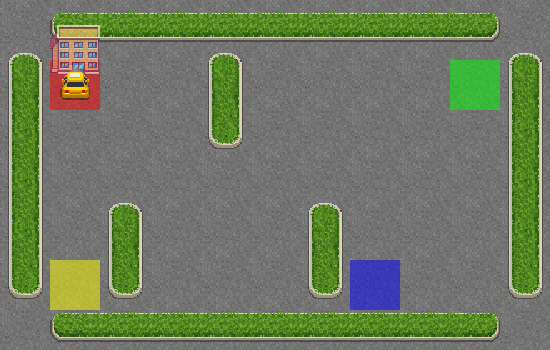

Accion 2 Estado 64 Recompensa -1 Total rec -2
TRAINED AGENT
Paso 2
Accion 4 Estado 84 Recompensa -10 Total rec -22
TRAINED AGENT
Paso 3
Accion 0 Estado 96 Recompensa -1 Total rec -24
TRAINED AGENT
Paso 4
Accion 0 Estado 196 Recompensa -1 Total rec -26
TRAINED AGENT
Paso 5
Accion 3 Estado 296 Recompensa -1 Total rec -28
TRAINED AGENT
Paso 6
Accion 3 Estado 276 Recompensa -1 Total rec -30
TRAINED AGENT
Paso 7
Accion 2 Estado 156 Recompensa -1 Total rec -32
TRAINED AGENT
Paso 8
Accion 2 Estado 176 Recompensa -1 Total rec -34
TRAINED AGENT
Paso 9
Accion 0 Estado 196 Recompensa -1 Total rec -36
TRAINED AGENT
Paso 10
Accion 0 Estado 196 Recompensa -1 Total rec -38
TRAINED AGENT
Paso 11
Accion 3 Estado 296 Recompensa -1 Total rec -40
TRAINED AGENT
Paso 12
Accion 3 Estado 276 Recompensa -1 Total rec -42
TRAINED AGENT
Paso 13
Accion 3 Estado 256 Recompensa -1 Total rec -44
TRAINED AGENT
Paso 14
Accion 1 Estado 336 Recompensa -1 Total rec -46
TRAINED AGENT
Paso 15
Accion 3 Estado 256 Recompensa 

In [10]:
rltaxi()

###### Ejercicio comparar recompensas de ambos metodos con 3 diferentes numeros de iteraciones.